Neural networks in general tend to be black boxes, so its very difficult to interpret them beyond their performance metrics.
It wont tell you how many lags it found useful etc.
##### ARIMA based models are much easier to undertand and tweak around(and often perform better)! So, use NN as last resorts!

In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


##### We will create a random linear regression line of the form:
y = mx + b + noise

##### Creating random datapoints:

In [2]:
m = 2
b = 3
x = np.linspace(0,50,100)

In [3]:
np.random.seed(101)
noise = np.random.normal(loc=0, scale=4, size=len(x))

In [4]:
noise

array([ 1.08273994e+01,  2.51253084e+00,  3.63187779e+00,  2.01530302e+00,
        2.60447179e+00, -1.27727218e+00, -3.39230793e+00,  2.42386140e+00,
       -8.07267298e+00,  2.96048823e+00,  2.11525398e+00, -2.35600213e+00,
        7.54781238e-01, -3.03548822e+00, -3.73294887e+00,  3.82022604e+00,
        7.63177289e-01,  7.91502930e+00,  1.04238691e+01,  2.73403554e+00,
        1.21066179e+00,  6.77489170e+00, -6.82434372e+00, -4.63647766e+00,
       -5.39362882e-01,  1.56211137e+00,  6.67618544e-01,  7.38007437e-01,
        3.23082366e+00,  2.91838701e-01,  2.55514805e+00,  1.31858520e+00,
       -1.98841609e+00, -3.01627880e+00, -3.77362561e+00,  1.93900659e+00,
       -4.67093266e-01,  7.60701918e+00,  9.52507835e-01,  7.98660914e+00,
       -3.97305400e+00,  7.87198020e-01, -4.54657837e+00,  1.46591842e-03,
        4.10393661e+00, -6.26391617e-01, -1.26316576e-01,  2.59930333e+00,
        8.61938577e+00, -2.44103542e+00, -3.02130136e+00, -1.38567401e+00,
        5.88107085e-01, -

In [5]:
x

array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
       10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
       12.62626263, 13.13131313, 13.63636364, 14.14141414, 14.64646465,
       15.15151515, 15.65656566, 16.16161616, 16.66666667, 17.17171717,
       17.67676768, 18.18181818, 18.68686869, 19.19191919, 19.6969697 ,
       20.2020202 , 20.70707071, 21.21212121, 21.71717172, 22.22222222,
       22.72727273, 23.23232323, 23.73737374, 24.24242424, 24.74747475,
       25.25252525, 25.75757576, 26.26262626, 26.76767677, 27.27272727,
       27.77777778, 28.28282828, 28.78787879, 29.29292929, 29.7979798 ,
       30.3030303 , 30.80808081, 31.31313131, 31.81818182, 32.32323232,
       32.82828283, 33.33333333, 33.83838384, 34.34343434, 34.84

In [6]:
y = m*x + b + noise

In [7]:
y

array([ 13.82739936,   6.52263185,   8.65207981,   8.04560605,
         9.64487583,   6.77323287,   5.66829813,  12.49456847,
         3.0081351 ,  15.05139732,  15.21626408,  11.75510898,
        15.87599336,  13.09582491,  13.40846528,  21.97174119,
        19.92479345,  28.08674647,  31.6056873 ,  24.92595473,
        24.412682  ,  30.98701291,  18.3978785 ,  21.59584557,
        26.70306136,  29.81463662,  29.93024481,  31.01073471,
        34.51365194,  32.58476799,  35.85817836,  35.63171651,
        33.33481623,  33.31705453,  33.56980873,  40.29254194,
        38.8965431 ,  47.98075655,  42.33634622,  50.38054854,
        39.4309864 ,  45.20133943,  40.87766405,  46.43580935,
        51.54838105,  47.82815384,  49.33832989,  53.07405081,
        60.10423426,  50.05391407,  50.48374915,  53.1294775 ,
        56.11335961,  54.61756138,  59.78053217,  62.65479667,
        55.86215953,  68.02721413,  57.05058994,  65.03787123,
        65.15018185,  72.95223574,  64.12018793,  67.55

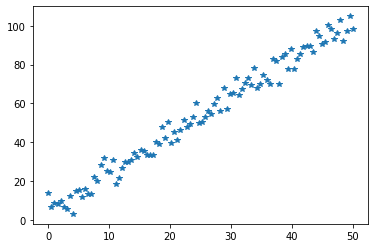

In [12]:
%matplotlib inline

plt.plot(x,y,'*')

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(units=4, input_dim=1, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x, y, epochs=200)

Epoch 1/200
100/100 [==============================] - 0s 719us/step - loss: 3628.1379
Epoch 2/200
100/100 [==============================] - 0s 44us/step - loss: 3620.4816
Epoch 3/200
100/100 [==============================] - 0s 79us/step - loss: 3612.4745
Epoch 4/200
100/100 [==============================] - 0s 70us/step - loss: 3604.3129
Epoch 5/200
100/100 [==============================] - 0s 40us/step - loss: 3596.3840
Epoch 6/200
100/100 [==============================] - 0s 70us/step - loss: 3587.4665
Epoch 7/200
100/100 [==============================] - 0s 40us/step - loss: 3578.6162
Epoch 8/200
100/100 [==============================] - 0s 60us/step - loss: 3569.8098
Epoch 9/200
100/100 [==============================] - 0s 59us/step - loss: 3560.6288
Epoch 10/200
100/100 [==============================] - 0s 40us/step - loss: 3550.9431
Epoch 11/200
100/100 [==============================] - 0s 50us/step - loss: 3541.3758
Epoch 12/200
100/100 [=============================

100/100 [==============================] - 0s 40us/step - loss: 1495.8278
Epoch 96/200
100/100 [==============================] - 0s 40us/step - loss: 1461.4247
Epoch 97/200
100/100 [==============================] - 0s 90us/step - loss: 1429.4215
Epoch 98/200
100/100 [==============================] - 0s 50us/step - loss: 1397.6720
Epoch 99/200
100/100 [==============================] - 0s 40us/step - loss: 1365.2893
Epoch 100/200
100/100 [==============================] - 0s 40us/step - loss: 1331.9834
Epoch 101/200
100/100 [==============================] - 0s 130us/step - loss: 1299.2845
Epoch 102/200
100/100 [==============================] - 0s 40us/step - loss: 1268.4357
Epoch 103/200
100/100 [==============================] - 0s 70us/step - loss: 1235.9775
Epoch 104/200
100/100 [==============================] - 0s 40us/step - loss: 1204.9693
Epoch 105/200
100/100 [==============================] - 0s 40us/step - loss: 1172.8444
Epoch 106/200
100/100 [==========================

100/100 [==============================] - 0s 40us/step - loss: 30.4689
Epoch 189/200
100/100 [==============================] - 0s 70us/step - loss: 29.5177
Epoch 190/200
100/100 [==============================] - 0s 50us/step - loss: 28.5883
Epoch 191/200
100/100 [==============================] - 0s 40us/step - loss: 27.7519
Epoch 192/200
100/100 [==============================] - 0s 110us/step - loss: 26.9592
Epoch 193/200
100/100 [==============================] - 0s 40us/step - loss: 26.1476
Epoch 194/200
100/100 [==============================] - 0s 80us/step - loss: 25.4074
Epoch 195/200
100/100 [==============================] - 0s 30us/step - loss: 24.7287
Epoch 196/200
100/100 [==============================] - 0s 40us/step - loss: 24.1346
Epoch 197/200
100/100 [==============================] - 0s 110us/step - loss: 23.5966
Epoch 198/200
100/100 [==============================] - 0s 40us/step - loss: 23.0942
Epoch 199/200
100/100 [==============================] - 0s 47us/s

In [22]:
model.history.history['loss']

[3628.13794921875,
 3620.4816015625,
 3612.474462890625,
 3604.31287109375,
 3596.383955078125,
 3587.46646484375,
 3578.61615234375,
 3569.8098046875,
 3560.628828125,
 3550.94314453125,
 3541.37580078125,
 3530.743720703125,
 3520.092763671875,
 3510.0146484375,
 3499.48431640625,
 3487.946083984375,
 3476.8884375,
 3465.2064453125,
 3452.6134765625,
 3439.47638671875,
 3427.147421875,
 3412.745810546875,
 3398.36732421875,
 3384.25408203125,
 3369.31013671875,
 3354.13029296875,
 3338.745732421875,
 3322.603671875,
 3305.708984375,
 3289.80810546875,
 3272.795234375,
 3255.354912109375,
 3237.189765625,
 3220.081357421875,
 3201.731904296875,
 3183.004345703125,
 3164.5879296875,
 3144.93171875,
 3125.9251953125,
 3106.739599609375,
 3085.63173828125,
 3063.7847265625,
 3043.05576171875,
 3020.65427734375,
 2999.1269921875,
 2974.8880078125,
 2953.2380419921874,
 2930.161123046875,
 2907.31359375,
 2883.34736328125,
 2859.75451171875,
 2834.4837109375,
 2809.26025390625,
 2784.09383

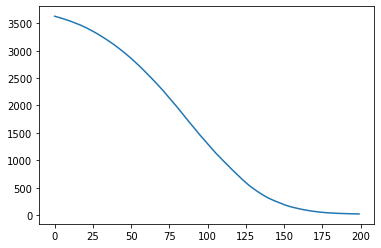

In [31]:
loss = model.history.history['loss']
epochs = range(len(loss))

ax = plt.plot(epochs, loss)

#### Thing to note in NN is:
The fitted model remains in memory and if we fit the model again, then it will start to fit the model from the place where it lefyt off last time.

In [32]:
model.fit(x,y,epochs=20)

Epoch 1/20
100/100 [==============================] - 0s 100us/step - loss: 21.9118
Epoch 2/20
100/100 [==============================] - 0s 50us/step - loss: 21.5430
Epoch 3/20
100/100 [==============================] - 0s 60us/step - loss: 21.2179
Epoch 4/20
100/100 [==============================] - 0s 50us/step - loss: 20.8899
Epoch 5/20
100/100 [==============================] - 0s 100us/step - loss: 20.6647
Epoch 6/20
100/100 [==============================] - 0s 50us/step - loss: 20.4228
Epoch 7/20
100/100 [==============================] - 0s 45us/step - loss: 20.2382
Epoch 8/20
100/100 [==============================] - 0s 50us/step - loss: 20.0663
Epoch 9/20
100/100 [==============================] - 0s 40us/step - loss: 19.9162
Epoch 10/20
100/100 [==============================] - 0s 110us/step - loss: 19.7569
Epoch 11/20
100/100 [==============================] - 0s 94us/step - loss: 19.6131
Epoch 12/20
100/100 [==============================] - 0s 40us/step - loss: 19.500

In [33]:
x_for_predictions=np.linspace(0,50,100)

y_pred = model.predict(x_for_predictions)

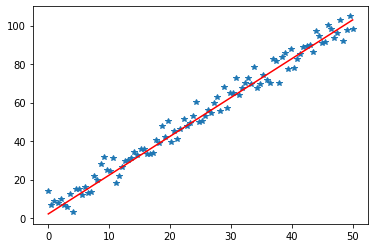

In [35]:
plt.plot(x,y,'*')
plt.plot(x_for_predictions, y_pred,'r')

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mse = mean_squared_error(y,y_pred)

In [38]:
mse

18.69494048540887

-------------------------

### Recurring Neural Networks:

##### Normal Neuron:

##### Recurrent Neuron:

Recurrent Neurons sends the output back to itself.
The output goes back to the input of the same neuron!
So if we unroll it wrt time:

##### Its important to note that the neurons are actually receiving inputs from both the previous timesteps as well as inputs from the current timesteps!

Cells that are a function of inputs from previous time steps are a.k.a. Memory cells

##### So, we need some sort of long-term memory for our networks!
##### The LSTM(Long Short-Term Memory) cells was created to help address these RNN issues. LSTMs maintains the cell state along with output of a recurrent neuron cell h(t-1)(which is fed as input) and the actual input at time t.

##### GRU : Gated Recurrent Unit

##### DGRU: Depth Gated recurrent unit Neural networks

##### LSTM cell with 'Peepholes':